# Project: Bank Customer Churn Prediction using ANN and H2O Auto ML models
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#EDAs">Eploratory Data Analysis</a></li>
<li><a href="#FeatureEngineering">Feature Engineering</a></li>
<li><a href="#ANNmodel">Model Building using ANN </a></li>
<li><a href="#H20model">Model Building and Prediction using H2O Auto ML</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>


## Introduction: 
<a id="intro"></a>

<p>Bank churn rate refers to the percentage of customers who close their accounts or stop using the bank's services within a given period of time. It is a measure of customer loyalty and can be an indicator of the bank's overall health and customer satisfaction. A high churn rate may indicate that the bank is not meeting the needs of its customers or that it is losing market share to competitors. 

It is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance.

To reduce churn, banks may offer incentives to customers to encourage them to continue using their services, such as rewards programs or lower fees. They may also work to improve the customer experience and address any issues that may be causing customers to leave.</p>

## Aim:
+ To identify and visualize which factors contribute to customer churn.

+ By building a prediction model that will perform the following:

     + Classify if a customer is going to churn or not
     + Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn
     
 
## Data Description
We have data set `Churn_Modelling` in CSV format with the following columns described:

- `RowNumber` - 
- `CustomerId` - Customer identification number
- `Surname` - Customer Surname
- `CreditScore` - Customer credit score
- `Geography` - Geographic location of customer
- `Gender` - Customer gender
- `Age` - Customer age
- `Tenure` - average time measured in years since customers initiated their contracts/accounts
- `Balance` - Customer balance
- `NumOfProducts` - Number of financial products signed on by customer
- `HasCrCard` - Does customer have a credit card?, an enumeration consisting of the following mapping:
    - `0` - No
    - `1` - Yes
- `IsActiveMember` - An indicator of the activity or dormancy of client account, an enumeration consisting of the following mapping:
    - `0` - inactive/dormant account
    - `1` - active account
- `EstimatedSalary` - Salary of client
- `Exited` - ClData Analysisient felt the bank, an enumeration consisting of the following mapping:
    - `0` - retained
    - `1` - churned

In [100]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
import h2o
from h2o.automl import H2OAutoML
%matplotlib inline

## Data wranlging
<a id='wrangling'></a>

In [102]:
url = 'https://github.com/dell-datascience/Bank-Customer-Churn-Prediction/raw/main/Churn_Modelling.csv'
df = pd.read_csv(url)

In [103]:
df.sample(5,random_state=13)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5952,5953,15657535,Pearson,590,Spain,Male,29,10,0.00,1,1,1,51907.72,1
1783,1784,15693381,Tipton,533,Spain,Male,38,1,135289.33,2,0,1,152956.33,0
4811,4812,15686941,Hutchinson,575,Spain,Female,26,7,0.00,2,1,0,112507.63,0
145,146,15800703,Madukwe,485,Spain,Female,21,5,113157.22,1,1,1,54141.50,0
7146,7147,15646594,Ali,749,France,Male,41,5,57568.94,1,1,1,61128.29,0


In [104]:
# inspect number of entries and features
df.shape

(10000, 14)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


> There are no missing data and data format are correct

In [106]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [107]:
# Drop columns with little relevance 
df.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [108]:
df.sample(5,random_state=13)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5952,590,Spain,Male,29,10,0.00,1,1,1,51907.72,1
1783,533,Spain,Male,38,1,135289.33,2,0,1,152956.33,0
4811,575,Spain,Female,26,7,0.00,2,1,0,112507.63,0
145,485,Spain,Female,21,5,113157.22,1,1,1,54141.50,0
7146,749,France,Male,41,5,57568.94,1,1,1,61128.29,0


## Exploratory data analysis
<a id="EDAs"></a>
### We will plot a Pie Chart 

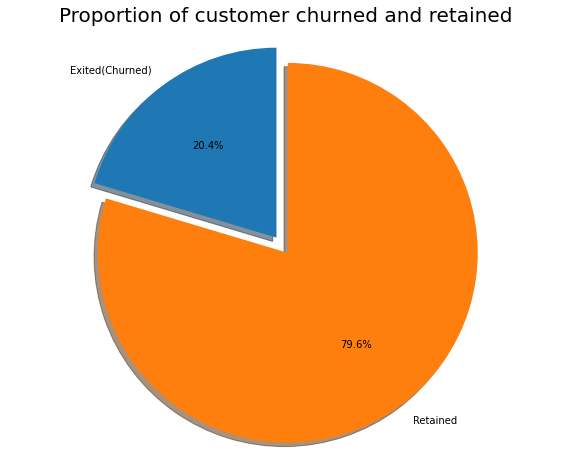

In [109]:
labels = 'Exited(Churned)', 'Retained'
sizes = df.query('Exited==1').shape[0], df.query('Exited==0').shape[0]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

> It is evient that a little over 20% of client churn while about 80% stay

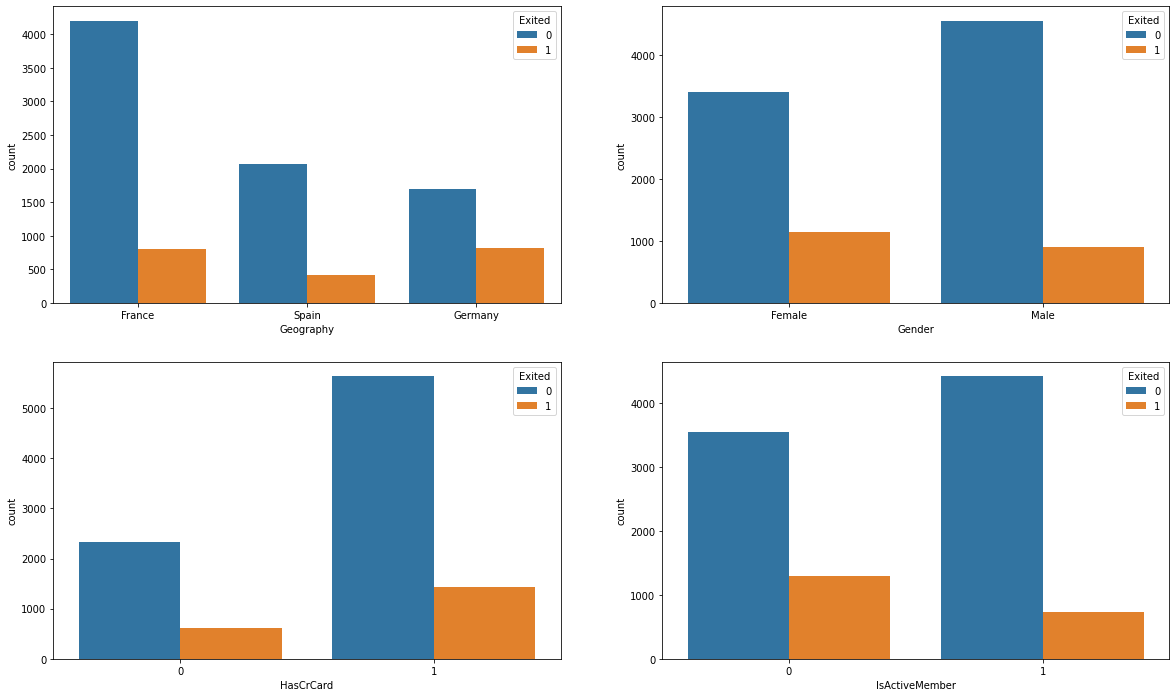

In [110]:
# We first review the 'Status' relation with categorical variables
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][0]);
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[0][1]);
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][0]);
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[1][1]);

> From the charts above, clients from Spain have the lowest churn amongst France and Germany, with both genders equally churning at the same level. It must be said that clients with creditcards have a higher churn  than those without and inactive client also have a churn than actie clients.

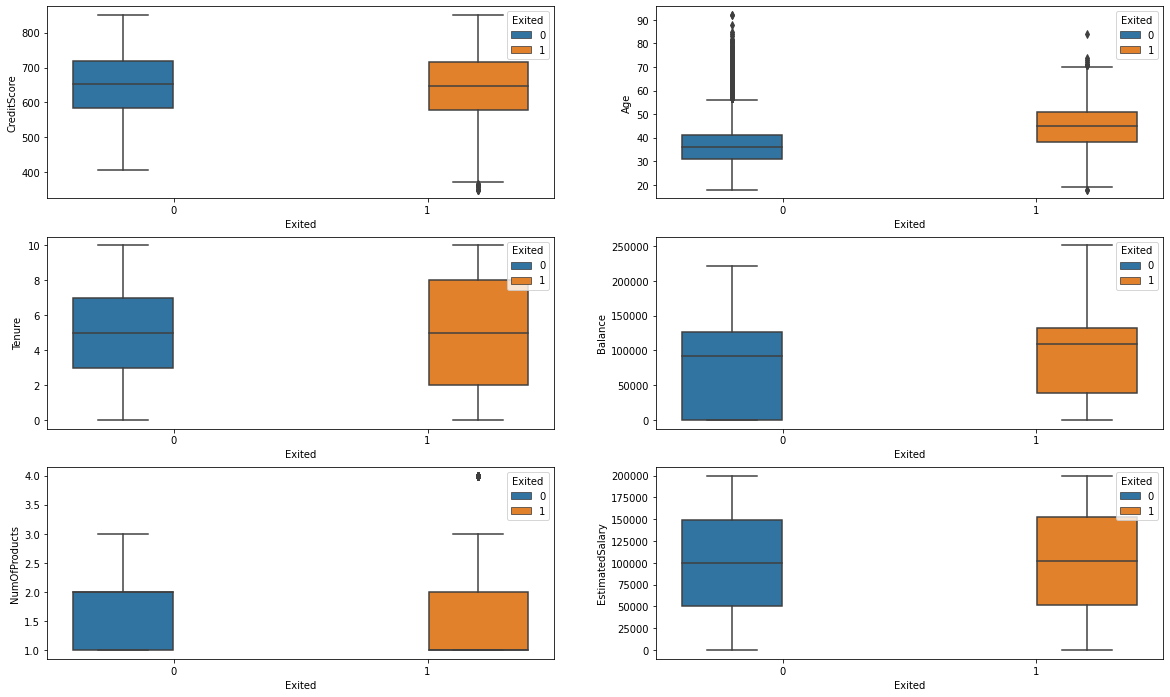

In [111]:
# Relations based on the continuous data attributes
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=ax[0][0]);
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=ax[0][1]);
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][0]);
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][1]);
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][0]);
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][1]);

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


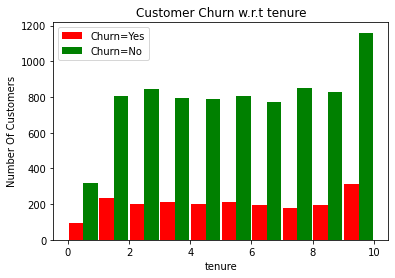

In [112]:
tenure_churn_no = df.query('Exited==0').Tenure
tenure_churn_yes = df.query('Exited==1').Tenure

plt.xlabel("tenure");
plt.ylabel("Number Of Customers");
plt.title("Customer Churn w.r.t tenure");

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No']);
plt.legend();

<a id="FeatureEngineering"></a>
## Feature Engineering

(-1.0, 5.0)

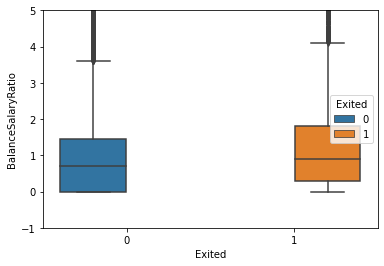

In [113]:
# Making a new column BalanceSalaryRatio

df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

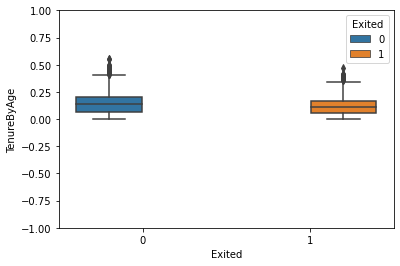

In [114]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

In [115]:
# Printing the categorical variables

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [116]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [117]:
# Label Encoding

df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [118]:
# One Hot Encode geography column

df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [119]:
# Standardize select columns to increase accuracy of model
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [120]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [121]:
# Separate independent features and dependent features
# Split into train (80%) and test (20%) samples to prevent overfitting

X = df1.drop('Exited',axis='columns')  
y = df1['Exited']  

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [122]:
X_train.shape, X_test.shape

((8000, 14), (2000, 14))

<a id="ANNmodel"></a>
## Model Building using ANN 

### The Sequential model
 A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

 #### NB: A Sequential model is not appropriate when:

- model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [99]:

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(None,32,14), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


250/250 [==============================] - 1s 2ms/step - loss: 0.5709 - accuracy: 0.7490
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7952
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.8018
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8080
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4295 - accuracy: 0.8200
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.8213
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8246
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8225
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8291
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8319
E

In [123]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8540


[0.35665225982666016, 0.8539999723434448]

In [124]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.01954668],
       [0.07575098],
       [0.06334291],
       ...,
       [0.029462  ],
       [0.00857586],
       [0.06699493]], dtype=float32)

> Converting our predictions to 0,1 to check accuracy

In [125]:
y_pred = [1 if x>0.5 else 0 for x in yp]

In [126]:
pd.Series(y_pred).unique()

array([0, 1])

> Checking the accuracy 

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.44      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



The model has low recal score of 0.46 for churning clients, although this is low, the model has a fairly good precision score of 0.72. This means that although the bank may not be able to actively identify all clients who will churn, when it does identify a client then that client is a real candidate for churning. And the bank could actively taget that client with cold calls, emails, instagram ads, and other incentives in effor to increase their activity and eventually curbe the possibility of that client churning. 

Also the model has a high recall score of 0.95 in predicting clients who stay. The bank can then reward those clients for their loyalty and increase their loan credit level. 

It also has a precision score of 0.87 for staying client, which is impressive. In the sense that 87 out of 100 predictions in identifying client who stay are actually correct. Thus the bank can actively target these clients for rewards with  little chances of erroneously rewarding clients who will churn. 

Text(69.0, 0.5, 'Truth')

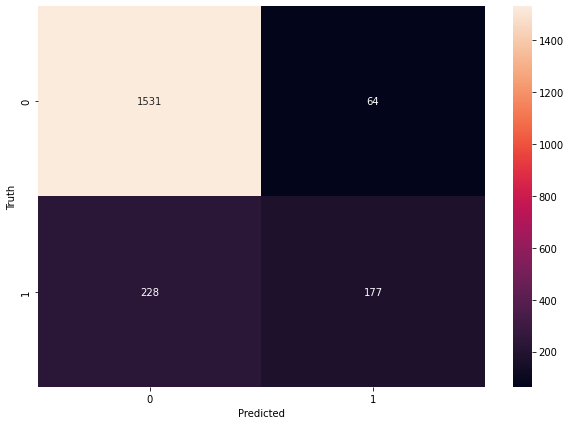

In [128]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [129]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  85.39999999999999 %


### Model Building and Prediction using H2O Auto ML
<a id="H20model"></a>

>H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

In [130]:
# Importing the h2o Python module and H2OAutoML class
# the h2o.init() makes sure that no prior instance of H2O is running

h2o.init(max_mem_size='16G')  

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,51 mins 14 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_9ec2ll
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.97 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [131]:
# Loading the data
df = h2o.import_file(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [132]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


> H2O auto ml can do all the data preprocessing techniques

In [133]:
# Split into train (80%) and test (20%) samples to prevent overfitting
df_train,df_test= df.split_frame(ratios=[.8])

In [134]:
df_train.shape,df_test.shape

((8068, 14), (1932, 14))

In [135]:
# Separate independent features and dependent features

y = "Exited"  
x = df.columns  
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

In [136]:
# Defining the model
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

In [137]:
# Fitting the model
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
18:03:50.299: Project: AutoML_3_20221224_180350
18:03:50.300: Setting stopping tolerance adaptively based on the training frame: 0.0111331242304837
18:03:50.300: Build control seed: 10
18:03:50.300: training frame: Frame key: AutoML_3_20221224_180350_training_py_19_sid_82f4    cols: 14    rows: 8068  chunks: 8    size: 433262  checksum: 5536379649411124594
18:03:50.303: validation frame: NULL
18:03:50.303: leaderboard frame: NULL
18:03:50.304: blending frame: NULL
18:03:50.304: response column: Exited
18:03:50.304: fold column: null
18:03:50.304: weights column: null
18:03:50.304: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_

,mean,sd,cv_1_valid,cv_2_valid
mae,0.2110405,0.0017089,0.2122489,0.2098322
mean_residual_deviance,0.1031074,0.0040716,0.1059865,0.1002284
mse,0.1031074,0.0040716,0.1059865,0.1002284
null_deviance,655.70386,14.366289,645.54535,665.86237
r2,0.3655240,0.0289439,0.3450576,0.3859905
residual_deviance,415.80588,9.863137,422.78018,408.83157
rmse,0.3210722,0.0063406,0.3255557,0.3165887
rmsle,0.2257821,0.0040177,0.2286230,0.2229411


> Seeing the Leaderboard

In [138]:
lb = aml.leaderboard

In [139]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20221224_180350,0.321036,0.103064,0.210863,0.225766,0.103064
StackedEnsemble_BestOfFamily_1_AutoML_3_20221224_180350,0.321969,0.103664,0.212723,0.226551,0.103664
GBM_1_AutoML_3_20221224_180350,0.322848,0.104231,0.215421,0.227263,0.104231
GBM_3_AutoML_3_20221224_180350,0.323402,0.104589,0.213015,0.227114,0.104589
GBM_2_AutoML_3_20221224_180350,0.323787,0.104838,0.213411,0.227301,0.104838
GBM_4_AutoML_3_20221224_180350,0.327803,0.107455,0.218597,0.230526,0.107455
DRF_1_AutoML_3_20221224_180350,0.32969,0.108696,0.217151,0.233267,0.108696
XGBoost_3_AutoML_3_20221224_180350,0.330879,0.109481,0.219934,0.23393,0.109481
XRT_1_AutoML_3_20221224_180350,0.341754,0.116795,0.256117,0.244157,0.116795
XGBoost_1_AutoML_3_20221224_180350,0.356416,0.127032,0.249526,0.260438,0.127032


> Getting all the model ids

In [140]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [141]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_3_20221224_180350',
 'StackedEnsemble_BestOfFamily_1_AutoML_3_20221224_180350',
 'GBM_1_AutoML_3_20221224_180350',
 'GBM_3_AutoML_3_20221224_180350',
 'GBM_2_AutoML_3_20221224_180350',
 'GBM_4_AutoML_3_20221224_180350',
 'DRF_1_AutoML_3_20221224_180350',
 'XGBoost_3_AutoML_3_20221224_180350',
 'XRT_1_AutoML_3_20221224_180350',
 'XGBoost_1_AutoML_3_20221224_180350',
 'XGBoost_2_AutoML_3_20221224_180350',
 'GLM_1_AutoML_3_20221224_180350']

In [142]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.10089834598324295
RMSE: 0.31764499993427087
MAE: 0.2053928093913349
RMSLE: 0.22333124482616679
Mean Residual Deviance: 0.10089834598324295
R^2: 0.3725447409440825
Null degrees of freedom: 1931
Residual degrees of freedom: 1924
Null deviance: 310.6929515086068
Residual deviance: 194.93560443962537
AIC: 1069.4626421398293

> Getting the model details for best performing model

In [143]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

,mean,sd,cv_1_valid,cv_2_valid
mae,0.2110405,0.0017089,0.2122489,0.2098322
mean_residual_deviance,0.1031074,0.0040716,0.1059865,0.1002284
mse,0.1031074,0.0040716,0.1059865,0.1002284
null_deviance,655.70386,14.366289,645.54535,665.86237
r2,0.3655240,0.0289439,0.3450576,0.3859905
residual_deviance,415.80588,9.863137,422.78018,408.83157
rmse,0.3210722,0.0063406,0.3255557,0.3165887
rmsle,0.2257821,0.0040177,0.2286230,0.2229411


In [144]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_3_20221224_180350',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_3_20221224_180350'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20221224_180350_training_py_19_sid_82f4',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20221224_180350_training_py_19_sid_82f4'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20221224_180350_training_py_19_sid_82f4',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20221224_180350_training_py_19_sid_82f4'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    

In [145]:
aml.leader

,mean,sd,cv_1_valid,cv_2_valid
mae,0.2110405,0.0017089,0.2122489,0.2098322
mean_residual_deviance,0.1031074,0.0040716,0.1059865,0.1002284
mse,0.1031074,0.0040716,0.1059865,0.1002284
null_deviance,655.70386,14.366289,645.54535,665.86237
r2,0.3655240,0.0289439,0.3450576,0.3859905
residual_deviance,415.80588,9.863137,422.78018,408.83157
rmse,0.3210722,0.0063406,0.3255557,0.3165887
rmsle,0.2257821,0.0040177,0.2286230,0.2229411


In [146]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [147]:
y_pred

predict
0.231207
0.107506
0.969324
0.0325727
0.964634
-0.0162262
0.265959
0.0055244
0.0480402
0.1506



## Conclusion
<a id="conclusion"></a>

We have been able to develop a model with fairly good predictive ability of predicting customer churn amongst bank clients.